# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nikola Izzan Ar Rasheed
- **Email:** izzannikola@student.ub.ac.id
- **ID Dicoding:** nikolaizzan

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda berdasarkan jam?
- Bagaimana perbedaan jumlah peminjaman sepeda antara hari kerja dan hari libur?
- Apakah faktor perbedaan musim berpengaruh terhadap peminjaman sepeda?
- Bagaimana tren perkembangan peminjaman sepeda dari Januari 2011 - Desember 2012?
- Apakah ada anomali atau event besar yang memengaruhi peminjaman sepeda berdasarkan lonjakan data yang tiba-tiba dan tidak menentu?

## Import Semua Packages/Library yang Digunakan

Berikut merupakan library-library yang akan digunakan dalam pengerjaan project ini

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Melakukan pembacaan dataset-dataset yang akan dianalisis dan melihat 5 baris utama pada setiap dataset.

In [431]:
# Memuat dataset
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Melihat 5 baris pertama
print(day_df.head().to_string())
print(hour_df.head().to_string())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit      temp     atemp       hum  windspeed  casual  registered   cnt
0        1  2011-01-01       1   0     1        0        6           0           2  0.344167  0.363625  0.805833   0.160446     331         654   985
1        2  2011-01-02       1   0     1        0        0           0           2  0.363478  0.353739  0.696087   0.248539     131         670   801
2        3  2011-01-03       1   0     1        0        1           1           1  0.196364  0.189405  0.437273   0.248309     120        1229  1349
3        4  2011-01-04       1   0     1        0        2           1           1  0.200000  0.212122  0.590435   0.160296     108        1454  1562
4        5  2011-01-05       1   0     1        0        3           1           1  0.226957  0.229270  0.436957   0.186900      82        1518  1600
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp

**Insight:**
- Dataset day.csv mencatat peminjaman sepeda dengan penghitungan per hari selama 731 hari.
- Dataset hour.csv mencatat peminjaman sepeda dengan penghitungan per jam selama 17379 jam.

### Assessing Data
Melakukan pemeriksaan data untuk mengidentifikasi masalah yang ada pada dataset.

In [432]:
# Memeriksa dataset day_df
print(day_df.info())
print(day_df.isna().sum())
print(f"Jumlah data yang terduplikasi: {day_df.duplicated().sum()}")

day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [433]:
# Memeriksa dataset hour_df
print(hour_df.info())
print(hour_df.isna().sum())
print(f"Jumlah data yang terduplikasi: {hour_df.duplicated().sum()}")

hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
instant       0
dteday        0
season      

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [434]:
# Mengidentifikasi outlier pada dataset day_df
q25_casual, q75_casual = np.percentile(day_df['casual'], 25), np.percentile(day_df['casual'], 75)
q25_registered, q75_registered = np.percentile(day_df['registered'], 25), np.percentile(day_df['registered'], 75)

iqr_casual = q75_casual - q25_casual
iqr_registered = q75_registered - q25_registered

cut_off_casual = iqr_casual * 1.5
cut_off_registered = iqr_registered * 1.5

minimum_casual, maximum_casual = q25_casual - cut_off_casual, q75_casual + cut_off_casual
minimum_registered, maximum_registered = q25_registered - cut_off_registered, q75_registered + cut_off_registered

casual_outliers = [x for x in day_df['casual'] if x < minimum_casual or x > maximum_casual]
registered_outliers = [x for x in day_df['registered'] if x < minimum_registered or x > maximum_registered]

print(casual_outliers)
print(registered_outliers)

[2355, 2282, 3065, 2418, 2521, 2397, 3155, 2469, 2301, 2347, 3252, 2795, 2846, 2541, 2496, 2622, 3410, 2704, 2855, 3283, 2557, 2795, 2494, 2708, 2963, 2634, 2657, 2551, 2562, 2355, 2544, 2345, 2827, 2352, 2613, 2570, 3160, 2512, 2454, 2589, 3031, 2806, 2643, 2290]
[]


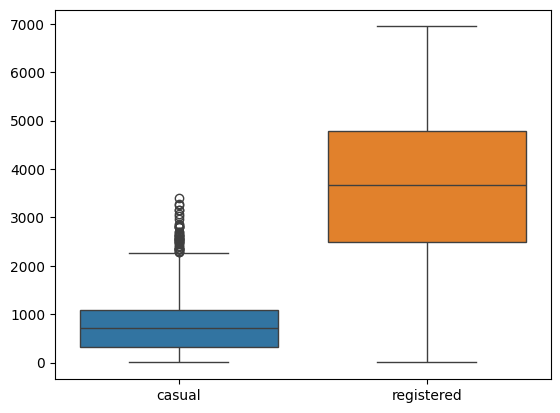

In [435]:
# Melakukan visualisasi box plot untuk identifikasi outlier pada dataset day_df
sns.boxplot(data=day_df[['casual', 'registered']])
plt.show()

In [436]:
# Mengidentifikasi outlier pada dataset hour_df
q25_casual, q75_casual = np.percentile(hour_df['casual'], 25), np.percentile(hour_df['casual'], 75)
q25_registered, q75_registered = np.percentile(hour_df['registered'], 25), np.percentile(hour_df['registered'], 75)

iqr_casual = q75_casual - q25_casual
iqr_registered = q75_registered - q25_registered

cut_off_casual = iqr_casual * 1.5
cut_off_registered = iqr_registered * 1.5

minimum_casual, maximum_casual = q25_casual - cut_off_casual, q75_casual + cut_off_casual
minimum_registered, maximum_registered = q25_registered - cut_off_registered, q75_registered + cut_off_registered

casual_outliers = [x for x in hour_df['casual'] if x < minimum_casual or x > maximum_casual]
registered_outliers = [x for x in hour_df['registered'] if x < minimum_registered or x > maximum_registered]

print(casual_outliers)
print(registered_outliers)

[144, 149, 124, 126, 174, 168, 170, 175, 138, 120, 145, 172, 118, 139, 166, 219, 240, 174, 147, 148, 128, 121, 148, 156, 135, 119, 167, 181, 170, 179, 161, 143, 126, 182, 171, 180, 168, 149, 118, 124, 168, 205, 197, 167, 162, 142, 120, 178, 185, 184, 217, 191, 162, 134, 150, 123, 132, 129, 196, 143, 148, 119, 138, 142, 139, 166, 126, 128, 122, 120, 120, 195, 183, 206, 158, 137, 122, 173, 222, 191, 187, 232, 204, 191, 191, 117, 135, 164, 146, 180, 125, 120, 171, 145, 168, 172, 187, 201, 180, 173, 130, 139, 216, 237, 183, 221, 194, 214, 151, 141, 116, 153, 179, 133, 142, 132, 115, 120, 150, 188, 193, 180, 168, 142, 127, 121, 123, 154, 161, 161, 138, 126, 124, 150, 148, 142, 169, 147, 131, 120, 131, 176, 142, 115, 134, 162, 135, 138, 153, 193, 210, 118, 141, 141, 149, 124, 146, 121, 159, 122, 140, 140, 151, 157, 175, 152, 121, 136, 127, 175, 197, 197, 174, 177, 178, 117, 144, 142, 178, 177, 168, 206, 179, 193, 156, 136, 131, 215, 198, 248, 225, 194, 195, 181, 142, 166, 177, 237, 242, 235,

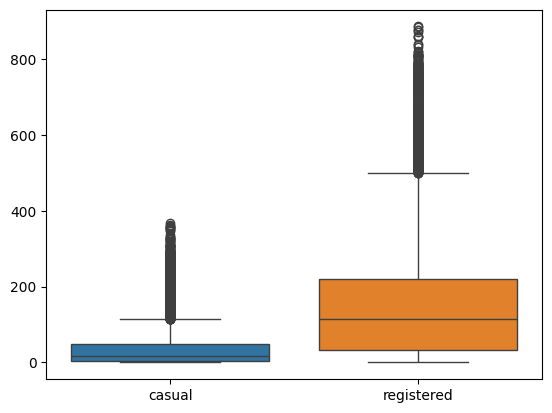

In [437]:
# Melakukan visualisasi box plot untuk identifikasi outlier pada dataset hour_df
sns.boxplot(data=hour_df[['casual', 'registered']])
plt.show()

**Insight:**
- Dari pemeriksaan data yang sudah dilakukan, terlihat bahwa dataset-dataset sudah cukup bersih, dimana tidak ada data yang terduplikasi, dan tidak ada missing values.
- Namun, ada kesalahan yaitu pada kolom 'dteday' yang seharusnya berisi tipe data datetime, masih memiliki tipe data 'object' jadi harus diperbaiki.
- Dan juga, terdapat outliers pada dataset day_df dan hour_df di kolom 'casual' dan 'registered', khususnya kolom 'registered' di dataset hour_df yang outliernya cukup ekstrim seperti yang terlihat pada visual box plot.

### Cleaning Data
Melakukan pembersihan data agar proses analisis data lebih mudah dilakukan.

In [438]:
# Mengubah tipe data kolom 'dteday' menjadi tipe data datetime
datetime_columns = ['dteday']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [439]:
# Melakukan rename terhadap setiap kolom agar lebih mudah dibaca
day_df = day_df.rename(columns={
    'dteday': 'Date',
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather',
    'temp': 'Temperature',
    'atemp': 'Feeling Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'casual': 'Casual',
    'registered': 'Registered',
    'cnt': 'Total'
})

In [440]:
# Melakukan perubahan angka menjadi kategorikal agar lebih mudah dibaca
day_df['Season'] = day_df['Season'].map(
    {
        1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    }
)

day_df['Year'] = day_df['Year'].map(
    {
        0: '2011', 1: '2012'
    }
)

day_df['Month'] = day_df['Month'].map(
    {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
)

day_df['Holiday'] = day_df['Holiday'].map(
    {
        0: 'No Holiday',
        1: 'Holiday'
    }
)

day_df['Weekday'] = day_df['Weekday'].map(
    {
        0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'
    }
)

day_df['Working Day'] = day_df['Working Day'].map(
    {
        0: 'Holiday/Weekend',
        1: 'Working Day'
    }
)

day_df['Weather'] = day_df['Weather'].map(
    {
        1: 'Clear',
        2: 'Mist and Cloudy',
        3: 'Light Snow',
        4: 'Heavy Rain'
    }
)

In [441]:
# Melakukan perubahan tipe data menjadi category
day_df['Season'] = day_df['Season'].astype('category')
day_df['Year'] = day_df['Year'].astype('category')
day_df['Month'] = day_df['Month'].astype('category')
day_df['Holiday'] = day_df['Holiday'].astype('category')
day_df['Weekday'] = day_df['Weekday'].astype('category')
day_df['Working Day'] = day_df['Working Day'].astype('category')
day_df['Weather'] = day_df['Weather'].astype('category')

day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   Date                 731 non-null    datetime64[ns]
 2   Season               731 non-null    category      
 3   Year                 731 non-null    category      
 4   Month                731 non-null    category      
 5   Holiday              731 non-null    category      
 6   Weekday              731 non-null    category      
 7   Working Day          731 non-null    category      
 8   Weather              731 non-null    category      
 9   Temperature          731 non-null    float64       
 10  Feeling Temperature  731 non-null    float64       
 11  Humidity             731 non-null    float64       
 12  Wind Speed           731 non-null    float64       
 13  Casual               731 non-null  

,instant,Date,Season,Year,Month,Holiday,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual,Registered,Total
0,1,2011-01-01,Spring,2011,January,No Holiday,Saturday,Holiday/Weekend,Mist and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No Holiday,Sunday,Holiday/Weekend,Mist and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No Holiday,Monday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No Holiday,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No Holiday,Wednesday,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [442]:
# Melakukan rename terhadap setiap kolom agar lebih mudah dibaca
hour_df = hour_df.rename(columns={
    'dteday': 'Date',
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'hr': 'Hour',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather',
    'temp': 'Temperature',
    'atemp': 'Feeling Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'casual': 'Casual',
    'registered': 'Registered',
    'cnt': 'Total'
})

In [443]:
# Melakukan perubahan angka menjadi kategorikal agar lebih mudah dibaca
hour_df['Season'] = hour_df['Season'].map(
    {
        1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    }
)

hour_df['Year'] = hour_df['Year'].map(
    {
        0: '2011', 1: '2012'
    }
)

hour_df['Month'] = hour_df['Month'].map(
    {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
)

hour_df['Holiday'] = hour_df['Holiday'].map(
    {
        0: 'No Holiday',
        1: 'Holiday'
    }
)

hour_df['Weekday'] = hour_df['Weekday'].map(
    {
        0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'
    }
)

hour_df['Working Day'] = hour_df['Working Day'].map(
    {
        0: 'Holiday/Weekend',
        1: 'Working Day'
    }
)

hour_df['Weather'] = hour_df['Weather'].map(
    {
        1: 'Clear',
        2: 'Mist and Cloudy',
        3: 'Light Snow',
        4: 'Heavy Rain'
    }
)

In [444]:
# Melakukan perubahan tipe data menjadi category
hour_df['Season'] = hour_df['Season'].astype('category')
hour_df['Year'] = hour_df['Year'].astype('category')
hour_df['Month'] = hour_df['Month'].astype('category')
hour_df['Holiday'] = hour_df['Holiday'].astype('category')
hour_df['Weekday'] = hour_df['Weekday'].astype('category')
hour_df['Working Day'] = hour_df['Working Day'].astype('category')
hour_df['Weather'] = hour_df['Weather'].astype('category')

hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   Date                 17379 non-null  datetime64[ns]
 2   Season               17379 non-null  category      
 3   Year                 17379 non-null  category      
 4   Month                17379 non-null  category      
 5   Hour                 17379 non-null  int64         
 6   Holiday              17379 non-null  category      
 7   Weekday              17379 non-null  category      
 8   Working Day          17379 non-null  category      
 9   Weather              17379 non-null  category      
 10  Temperature          17379 non-null  float64       
 11  Feeling Temperature  17379 non-null  float64       
 12  Humidity             17379 non-null  float64       
 13  Wind Speed           17379 non-

,instant,Date,Season,Year,Month,Hour,Holiday,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual,Registered,Total
0,1,2011-01-01,Spring,2011,January,0,No Holiday,Saturday,Holiday/Weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No Holiday,Saturday,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No Holiday,Saturday,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No Holiday,Saturday,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No Holiday,Saturday,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


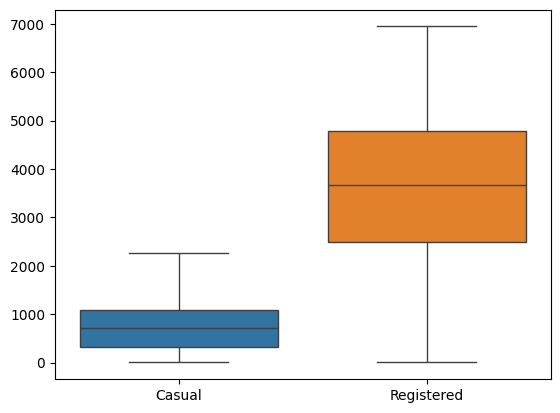

In [445]:
# Mengatasi outlier di dataset day_df dengan metode Winsorizing
def winsorize_series(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return series.clip(lower=lower_bound, upper=upper_bound)

day_df['Casual'] = winsorize_series(day_df['Casual'])
day_df['Registered'] = winsorize_series(day_df['Registered'])

sns.boxplot(data=day_df[['Casual', 'Registered']])
plt.show()

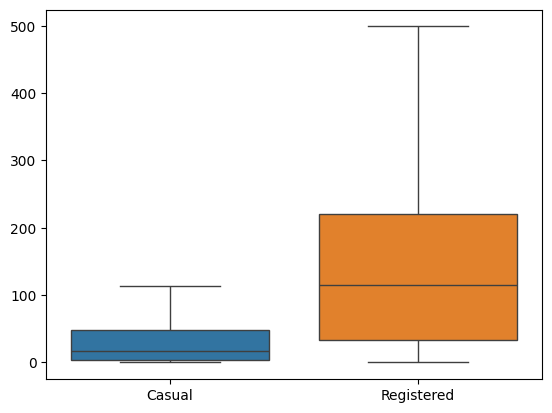

In [446]:
# Mengatasi outlier di dataset hour_df dengan metode Winsorizing
hour_df['Casual'] = winsorize_series(hour_df['Casual'])
hour_df['Registered'] = winsorize_series(hour_df['Registered'])

sns.boxplot(data=hour_df[['Casual', 'Registered']])
plt.show()

**Insight:**
1. Define:
- Menemukan tipe data kolom 'dteday' masih object.
- Nama kolom masih susah untuk dibaca.
- Tipe data kolom lain masih susah untuk dibaca.
- Ada beberapa outlier pada dataset day_df dan hour_df.

2. Code:
- Mengubah tipe data kolom 'dteday' menjadi datetime.
- Mengubah nama kolom agar mudah dibaca.
- Mengubah tipe data kolom lain menjadi category.
- Mengatasi outlier dengan metode winsorizing.

3. Verify:
- Melakukan review ulang dengan method info() dan head() untuk mengetahui apakah data sudah sesuai dengan yang diinginkan atau belum.
- Melakukan pengecekan terhadap box plot untuk pengecekan apakah outliers sudah teratasi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [447]:
print(day_df.describe(include='all').to_string())

           instant                 Date Season  Year   Month     Holiday Weekday  Working Day Weather  Temperature  Feeling Temperature    Humidity  Wind Speed       Casual   Registered        Total
count   731.000000                  731    731   731     731         731     731          731     731   731.000000           731.000000  731.000000  731.000000   731.000000   731.000000   731.000000
unique         NaN                  NaN      4     2      12           2       7            2       3          NaN                  NaN         NaN         NaN          NaN          NaN          NaN
top            NaN                  NaN   Fall  2012  August  No Holiday  Monday  Working Day   Clear          NaN                  NaN         NaN         NaN          NaN          NaN          NaN
freq           NaN                  NaN    188   366      62         710     105          500     463          NaN                  NaN         NaN         NaN          NaN          NaN          NaN
mean 

In [448]:
print(hour_df.describe(include='all').to_string())

           instant                           Date Season   Year  Month          Hour     Holiday   Weekday  Working Day Weather   Temperature  Feeling Temperature      Humidity    Wind Speed        Casual    Registered         Total
count   17379.0000                          17379  17379  17379  17379  17379.000000       17379     17379        17379   17379  17379.000000         17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
unique         NaN                            NaN      4      2     12           NaN           2         7            2       4           NaN                  NaN           NaN           NaN           NaN           NaN           NaN
top            NaN                            NaN   Fall   2012   July           NaN  No Holiday  Saturday  Working Day   Clear           NaN                  NaN           NaN           NaN           NaN           NaN           NaN
freq           NaN                            NaN   4496   8734   14

**Pola Peminjaman Sepeda Berdasarkan Jam**

In [449]:
hour_df.groupby(by='Hour').agg({
    'Casual': ['max', 'min', 'mean'],
    'Registered': ['max', 'min', 'mean'],
    'Total': ['max', 'min', 'mean']
})

Casual                Registered                 Total                
        max min       mean        max min        mean   max min        mean
Hour                                                                       
0        68   0  10.158402        234   0   43.739669   283   2   53.898072
1        49   0   6.504144        139   0   26.871547   168   1   33.375691
2        44   0   4.772028        104   0   18.097902   132   1   22.869930
3        26   0   2.715925         61   0    9.011478    79   1   11.727403
4        13   0   1.253945         22   0    5.098996    28   1    6.352941
5        16   0   1.411437         64   0   18.478382    66   1   19.889819
6        19   0   4.161379        203   0   71.882759   213   1   76.044138
7        40   0  11.055021        499   1  200.244842   596   1  212.064649
8        69   0  21.679505        499   4  299.524072   839   5  359.011004
9       114   0  30.763411        399   6  188.418157   426  14  219.309491
10      114   0  43.572215        351   8  127.191197   539   8  173.668501
11      114   0  51.499312        446   5  148.602476   663  10  208.143054
12      114   0  55.480769        499   3  184.969780   776   3  253.315934
13      114   0  56.814815        491   9  181.352538   760  11  253.661180
14      114   0  59.030178        499  12  165.377229   750  12  240.949246
15      114   0  58.844993        456   4  176.327846   750   7  251.233196
16      114   0  59.315068        481   8  238.238356   783  11  311.983562
17      114   0  62.389041        499  14  342.050685   976  15  461.452055
18      114   0  55.232143        499  20  328.188187   977  23  425.510989
19      114   0  46.140110        499  11  260.038462   743  11  311.523352
20      114   0  35.674451        461   8  189.796703   567  11  226.030220
21      114   0  27.995879        362   6  144.059066   584   6  172.314560
22      114   0  22.167582        327   5  109.082418   502   9  131.335165
23       71   0  15.199176        220   2   72.631868   256   2   87.831044

**Perbedaan Peminjaman Sepeda antara Hari Kerja dan Hari Libur**

In [450]:
day_df.groupby(by='Working Day').agg({
    'Casual': ['max', 'min', 'mean'],
    'Registered': ['max', 'min', 'mean'],
    'Total': ['max', 'min', 'mean']
})

<ipython-input-450-8ef6da57ce39>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='Working Day').agg({


Casual                    Registered                    \
                     max   min         mean        max  min         mean   
Working Day                                                                
Holiday/Weekend  2266.75  54.0  1296.732684       5966  451  2959.034632   
Working Day      2266.75   2.0   606.165500       6946   20  3978.250000   

                Total                    
                  max  min         mean  
Working Day                              
Holiday/Weekend  8714  605  4330.168831  
Working Day      8362   22  4584.820000

**Faktor Perbedaan Musim**

In [451]:
day_df.groupby(by='Season').agg({
    'Casual': ['max', 'min', 'mean'],
    'Registered': ['max', 'min', 'mean'],
    'Total': ['max', 'min', 'mean']
}).sort_values(by=('Total', 'mean'), ascending=False)

<ipython-input-451-3138177a5616>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='Season').agg({


Casual                     Registered                   Total        \
            max    min         mean        max  min         mean   max   min   
Season                                                                         
Fall    2266.75  118.0  1175.664894       6917  889  4441.691489  8714  1115   
Summer  2266.75  120.0  1056.684783       6456  674  3886.233696  8362   795   
Winter  2266.75    2.0   715.950843       6946   20  3999.050562  8555    22   
Spring  2266.75    9.0   330.020718       5315  416  2269.204420  7836   431   

                     
               mean  
Season               
Fall    5644.303191  
Summer  4992.331522  
Winter  4728.162921  
Spring  2604.132597

**Tren Perkembangan Peminjaman Sepeda Selama Dua Tahun**

In [452]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

day_df['Month'] = pd.Categorical(day_df['Month'], categories=month_order, ordered=True)

day_df.groupby(by=['Year', 'Month']).agg({'Total': ['max', 'min', 'mean']}).reset_index().sort_values(by=["Year", "Month"]).set_index(["Year", "Month"])

<ipython-input-452-e5ba89856e39>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['Year', 'Month']).agg({'Total': ['max', 'min', 'mean']}).reset_index().sort_values(by=["Year", "Month"]).set_index(["Year", "Month"])


Total                   
                 max   min         mean
Year Month                             
2011 January    1985   431  1231.903226
     February   2927  1005  1721.964286
     March      3239   605  2065.967742
     April      5312   795  3162.333333
     May        5805  2633  4381.322581
     June       5515  3767  4783.733333
     July       6043  3285  4559.387097
     August     5895  1115  4409.387097
     September  5423  1842  4247.266667
     October    5511   627  3984.225806
     November   4486  1495  3405.566667
     December   3940   705  2816.870968
2012 January    4521  1301  3120.774194
     February   5062  1529  3556.448276
     March      8362  3194  5318.548387
     April      7460  1027  5807.466667
     May        8294  2843  6318.225806
     June       8120  4127  6761.000000
     July       8173  4459  6567.967742
     August     7865  4549  6919.451613
     September  8714  4073  7285.766667
     October    8156    22  6414.225806
     November   6852  2277  5088.800000
     December   6606   441  3990.741935

**Identifikasi Anomali Berdasarkan Lonjakan Data yang Tiba-Tiba**

In [453]:
daily_data = hour_df.groupby('Date').agg({
    'Total': 'sum'
}).reset_index()

daily_data['change'] = daily_data['Total'].diff()
daily_data['change'].fillna(0, inplace=True)

threshold = daily_data['change'].std() * 2
anomalies = daily_data[abs(daily_data['change']) > threshold]

print(anomalies)

          Date  Total  change
105 2011-04-16    795 -2331.0
106 2011-04-17   3744  2949.0
111 2011-04-22   1683 -2506.0
112 2011-04-23   4036  2353.0
238 2011-08-27   1115 -3546.0
239 2011-08-28   4334  3219.0
265 2011-09-23   2395 -2400.0
266 2011-09-24   5423  3028.0
273 2011-10-01   2429 -2773.0
284 2011-10-12   2416 -2147.0
291 2011-10-19   2424 -2324.0
301 2011-10-29    627 -3120.0
302 2011-10-30   3331  2704.0
319 2011-11-16   1817 -2378.0
341 2011-12-08   3322  2617.0
424 2012-02-29   1834 -2529.0
425 2012-03-01   4990  3156.0
441 2012-03-17   7836  3458.0
448 2012-03-24   3372 -4990.0
473 2012-04-18   4367 -2324.0
474 2012-04-19   6565  2198.0
477 2012-04-22   1027 -5597.0
478 2012-04-23   3214  2187.0
479 2012-04-24   5633  2419.0
499 2012-05-14   2843 -3275.0
500 2012-05-15   5115  2272.0
501 2012-05-16   7424  2309.0
506 2012-05-21   4359 -2770.0
517 2012-06-01   4127 -3211.0
518 2012-06-02   8120  3993.0
529 2012-06-13   7421  2449.0
568 2012-07-22   7410  2951.0
596 2012-0

<ipython-input-453-6e3f371f697a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_data['change'].fillna(0, inplace=True)


**Insight:**
- Pola berdasarkan jam menunjukkan bahwa peminjaman sepeda lebih banyak digunakan pada waktu aktivitas manusia berangkat kerja dan pulang kerja, seperti pagi hari tepatnya jam 8 pagi dan sore hari tepatnya jam 5 sore.
- Pola berdasarkan antara hari kerja dan hari libur juga menguatkan insight pertama, yaitu peminjaman sepeda lebih banyak digunakan saat hari kerja.
- Musim juga menjadi faktor dalam peminjaman sepeda, dimana pada musim gugur, orang-orang lebih banyak meminjam sepeda lebih dari dua kali lipat dibanding musim semi.
- Dilihat dari tren perkembangan peminjaman sepeda, bahwa terdapat kenaikan jumlah peminjaman dari tahun 2011 ke tahun 2012.
- Teridentifikasi bahwa ada beberapa data anomali yaitu data yang tiba-tiba mengalami lonjakan.

## Visualization & Explanatory Analysis

### Bagaimana pola peminjaman sepeda berdasarkan jam?

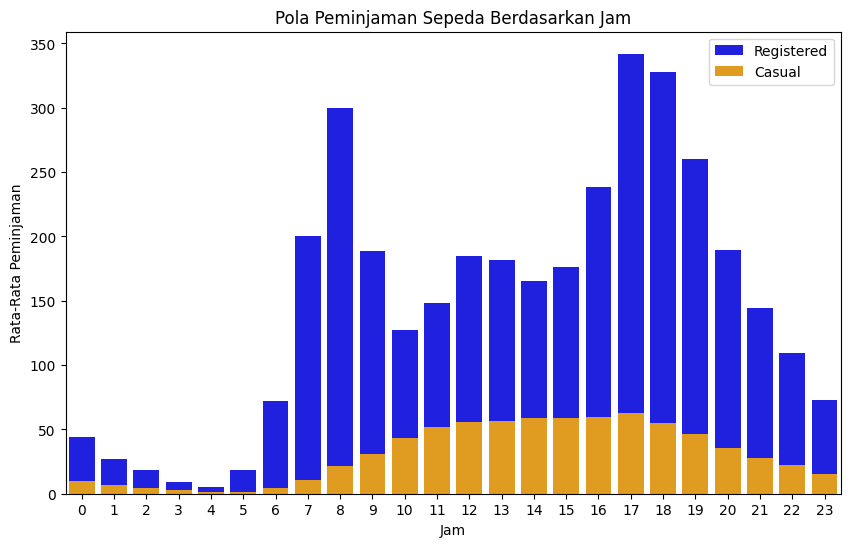

In [454]:
hourly_data = hour_df.groupby(by='Hour').agg({
    'Casual': 'mean',
    'Registered': 'mean',
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_data, x='Hour', y='Registered', color='blue', label='Registered')
sns.barplot(data=hourly_data, x='Hour', y='Casual', color='orange', label='Casual')

plt.title('Pola Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Peminjaman')
plt.show()

### Bagaimana perbedaan jumlah peminjaman sepeda antara hari kerja dan hari libur?

<ipython-input-455-350183aa3a64>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  working_day_data = day_df.groupby(by='Working Day').agg({


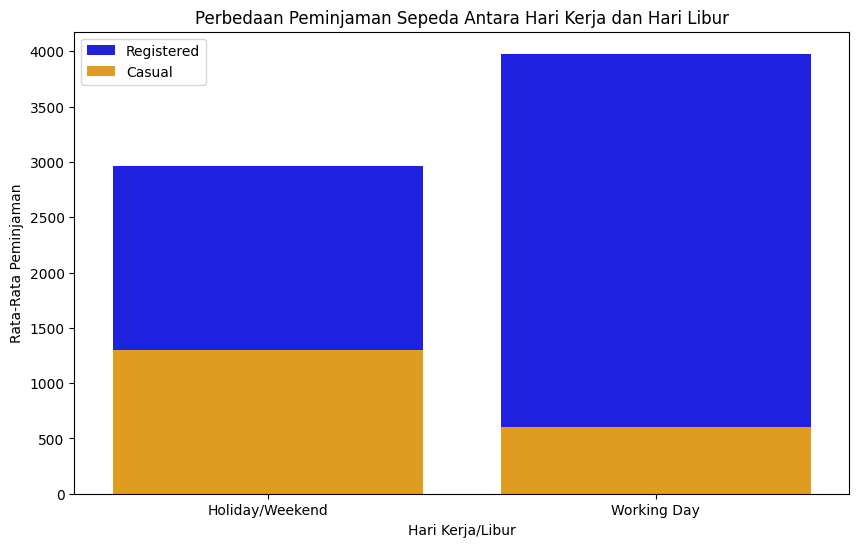

In [455]:
working_day_data = day_df.groupby(by='Working Day').agg({
    'Casual': 'mean',
    'Registered': 'mean',
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=working_day_data, x='Working Day', y='Registered', color='blue', label='Registered')
sns.barplot(data=working_day_data, x='Working Day', y='Casual', color='orange', label='Casual')

plt.title('Perbedaan Peminjaman Sepeda Antara Hari Kerja dan Hari Libur')
plt.xlabel('Hari Kerja/Libur')
plt.ylabel('Rata-Rata Peminjaman')
plt.show()

### Apakah faktor perbedaan musim berpengaruh terhadap peminjaman sepeda?

<ipython-input-456-55409e424d3c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data = day_df.groupby(by='Season').agg({


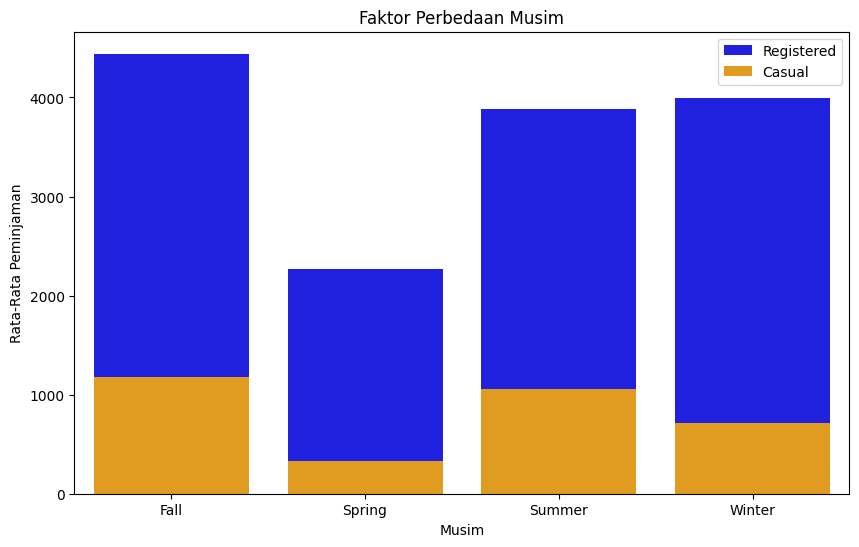

In [456]:
seasonal_data = day_df.groupby(by='Season').agg({
    'Casual': 'mean',
    'Registered': 'mean',
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data, x='Season', y='Registered', color='blue', label='Registered')
sns.barplot(data=seasonal_data, x='Season', y='Casual', color='orange', label='Casual')

plt.title('Faktor Perbedaan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Peminjaman')
plt.show()

### Bagaimana tren perkembangan peminjaman sepeda dari Januari 2011 - Desember 2012?

<ipython-input-457-181f36222c2f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = day_df.groupby(by=['Year', 'Month']).agg({


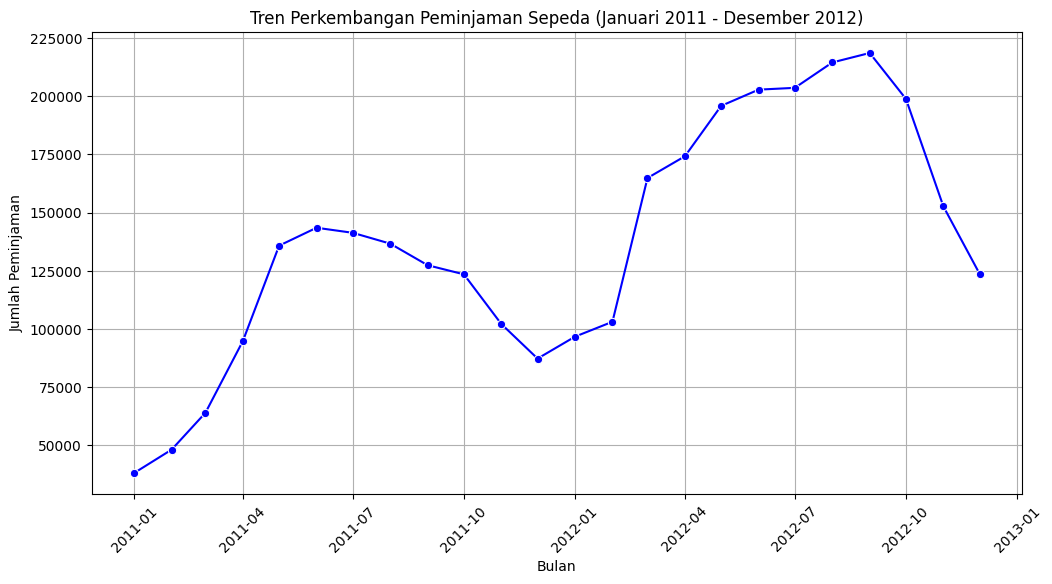

In [457]:
trend_data = day_df.groupby(by=['Year', 'Month']).agg({
    'Total': 'sum'
}).reset_index()

trend_data['Date'] = pd.to_datetime(trend_data['Year'].astype(str) + '-' + trend_data['Month'].astype(str), format='%Y-%B')

trend_data = trend_data.sort_values(by='Date')

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='Date', y='Total', marker='o', color='blue')

plt.title('Tren Perkembangan Peminjaman Sepeda (Januari 2011 - Desember 2012)')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

### Apakah ada anomali atau event besar yang memengaruhi peminjaman sepeda berdasarkan lonjakan data yang tiba-tiba dan tidak menentu?

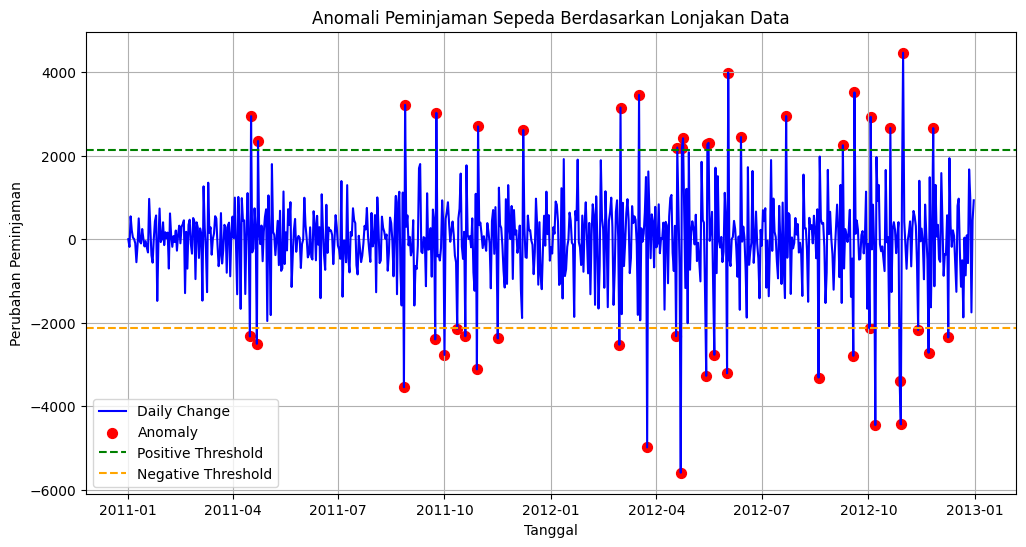

Jumlah Anomali Terdeteksi: 47
Anomali Besar yang Terdeteksi:
          Date  Total  change
448 2012-03-24   3372 -4990.0
477 2012-04-22   1027 -5597.0
518 2012-06-02   8120  3993.0
627 2012-09-19   7591  3518.0
645 2012-10-07   3510 -4455.0
667 2012-10-29     22 -4437.0
669 2012-10-31   5566  4470.0


In [458]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=daily_data, x='Date', y='change', ax=ax, label='Daily Change', color='blue')

ax.scatter(anomalies['Date'], anomalies['change'], color='red', label='Anomaly', s=50)

ax.axhline(threshold, color='green', linestyle='--', label='Positive Threshold')
ax.axhline(-threshold, color='orange', linestyle='--', label='Negative Threshold')

ax.set_title('Anomali Peminjaman Sepeda Berdasarkan Lonjakan Data')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Perubahan Peminjaman')

ax.legend()
ax.grid(True)

plt.show()

print(f'Jumlah Anomali Terdeteksi: {len(anomalies)}')
print('Anomali Besar yang Terdeteksi:')

high_anomalies = anomalies[(anomalies['change'] > 3500) | (anomalies['change'] < -4000)]
print(high_anomalies)

**Insight:**
- Dari setiap visualisasi data, terlihat bahwa pengguna 'registered' lebih sering meminjam sepeda, daripada pengguna 'casual' terutama pada malam hari.
- Pengguna 'casual' cenderung lebih banyak meminjam sepeda pada hari libur atau akhir pekan.

## Conclusion

###  **1. Bagaimana pola peminjaman sepeda berdasarkan jam?**
Pada visualisasi data pola peminjaman sepeda berdasarkan jam, terlihat bahwa pada pada jam 8 pagi dan jam 5 sore terdapat puncak dari data. Ini menunjukkan bahwa, sepeda banyak dipinjam pada waktu berangkat kerja di pagi hari dan pulang kerja di sore hari. Selain itu, pengguna 'registered' terlihat lebih banyak dibanding pengguna 'casual' karena mungkin pengguna 'registered' menjadikan peminjaman sepeda ini sebagai moda transportasi harian mereka.

### **2. Bagaimana perbedaan jumlah peminjaman sepeda antara hari kerja dan hari libur?**
Pada visualisasi kedua terlihat jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur atau akhir pekan. Hal ini menguatkan jawaban sebelumnya bahwa sepeda lebih banyak digunakan sebagai alat transportasi untuk aktivitas rutin seperti perjalanan ke kantor pada hari kerja. Namun, pada hari libur, data menunjukkan bahwa pengguna 'casual' hampir sama dengan pengguna 'registered' hal ini mungkin dipengaruhi dengan banyaknya orang-orang yang tidak menjadikan sepeda menjadi alat transportasi rutin, dan memakainya pada hari libur.

### **3. Apakah faktor perbedaan musim berpengaruh terhadap peminjaman sepeda?**
Dari hasil analisis data ini, terlihat jelas bahwa musim sangat mempengaruhi terhadap peminjaman sepeda, dengan musim gugur sebagai musim dengan jumlah peminjaman paling banyak, dan musim semi sebagai musim dengan jumlah peminjaman paling sedikit. Cuaca pada musim gugur relatif stabil dan sejuk dibanding dengan cuaca pada musim yang lain, jadi hal ini membuat orang-orang lebih senang untuk bersepeda.

### **4. Bagaimana tren perkembangan peminjaman sepeda dari Januari 2011 - Desember 2012?**
Berdasarkan tren peminjaman sepeda dari Januari 2011 hingga Desember 2012, terlihat adanya pola setiap musim yang konsisten. Peminjaman sepeda meningkat  pada musim semi hingga musim panas, mencapai puncaknya sekitar pertengahan tahun, kemudian menurun saat memasuki musim gugur dan musim dingin. Lalu juga, perkembangan peminjaman sepeda tahun 2011 relatif meningkat pada tahun 2012, menandakan peningkatan minat layanan peminjaman sepeda.

### **5. Apakah ada anomali atau event besar yang memengaruhi peminjaman sepeda berdasarkan lonjakan data yang tiba-tiba dan tidak menentu?**
Berdasarkan visualiasi perubahan harian, terlihat ada beberapa lonjakan yang sangat besar dalam peminjaman sepeda yang diidentifikasi sebagai anomali. Beberapa tanggal dengan perubahan terbesar seperti 24 Maret 2012, 22 April 2012, 2 Juni 2012, 19 September 2012, 7 Oktober 2012, 29 Oktober 2012, dan 31 Oktober 2012, masing-masing menunjukkan lonjakan atau penurunan peminjaman yang sangat besar dan secara tiba-tiba. Umumnya, hal ini dipengaruhi dengan beberapa faktor, seperti cuaca ekstrim, ada acara besar atau festival, dan lain-lain.
Contohnya, ada perubahan yang sangat besar yang dipengaruhi dengan musibah [Hurricane Sandy](https://en.wikipedia.org/wiki/Effects_of_Hurricane_Sandy_in_Maryland_and_Washington,_D.C.) yang terjadi pada tanggal 29-10-2012, dimana terlihat bahwa adanya penurunan tingkat peminjaman sepeda sebesar -4437. Kemudian, peminjaman sepeda kembali normal pada tanggal 31-10-2012 dengan kenaikan sebesar 4470.


Dari jawaban-jawaban dari pertanyaan bisnis yang sudah didefinisikan di atas. Dapat diambil kesimpulan bahwa hal-hal yang sudah dibahas ini bisa jadi dasar dalam perencanaan bisnis operasional, pengelolaan stok sepeda, dan juga pengembangan kebijakan harga dan layanan untuk dapat meningkatkan pengalaman pengguna.